#All in One runs the models
Copyright 2023, Denis Rothman

The goal of this notebook is to summarize OpenAI's recent models.
To get the best out of this summary notebook, make sure to read Transformers for NLP, 2nd Edition, *Chapter 17, The Consolidation of
 Suprahuman Transformers with OpenAI ChatGPT and GPT-4*


It contains an enternaining scenario that will help you review all the models in a nutshell:<br>
1.Installing OpenAI and modules for this notebook <br>
2.Entering a request<br>
3.Checking if the content is safe with the Moderation model<br>
4.Preparing the prompt for ChatGPT
5.ChatGPT 3.5-turbo tells a story<br>
6.GPT-4 writes a poem based on the story<br>
7.DALL-E 2 illustrates the poem<br>
8.Listening to the poem with gTTS<br>
9.Whisper transcribes the audio<br>

Click on Run All and enjoy the magic!

#1.Installing OpenAI and modules for this notebook


In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [2]:
#Importing openai
try:
  import openai
except:
  !pip install openai
  import openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 8.4 MB/s eta 0:00:00


In [3]:
#Open API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

#The OpenAI Key
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

Mounted at /content/drive


In [4]:
#Installing and importing gTTS
try:
  from gtts import gTTS
except:
  !pip install gTTS
  from gtts import gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Installing and importing PIL
try:
 from PIL import Image
except:
  !pip install pillow

In [6]:
import PIL
from PIL import Image, ImageDraw
import requests

#2.Entering a request 

In [7]:
 uinput = "Tell me story about a group of astronauts that are flying towards Mars in a spaceship with stars all around them."

# 3.Checking if the content is safe with the Moderation model

This function can be activated for all inputs and outputs

In [8]:
response = openai.Moderation.create(input=uinput)
response

<OpenAIObject id=modr-71rUJXt5fYBRXTCHcPy6A41anYDJa at 0x7f8bfcebb4a0> JSON: {
  "id": "modr-71rUJXt5fYBRXTCHcPy6A41anYDJa",
  "model": "text-moderation-004",
  "results": [
    {
      "categories": {
        "hate": false,
        "hate/threatening": false,
        "self-harm": false,
        "sexual": false,
        "sexual/minors": false,
        "violence": false,
        "violence/graphic": false
      },
      "category_scores": {
        "hate": 5.05366097058868e-06,
        "hate/threatening": 1.8879797281101673e-08,
        "self-harm": 2.862121029068021e-08,
        "sexual": 1.5595733771078812e-07,
        "sexual/minors": 2.424975775738858e-09,
        "violence": 1.6750299209888908e-06,
        "violence/graphic": 6.574982336360335e-08
      },
      "flagged": false
    }
  ]
}

You can parse the json object response and add all the moderation rules you need for your project

# 4.Preparing the prompt for ChatGPT

In [9]:
 #preparing the prompt 
 role="user"
 line = {"role": role, "content": uinput}
 
 #creating the message
 assert1={"role": "system", "content": "You are a great story teller."}
 assert2={"role": "assistant", "content": "You like space travel and imagining that humanity will explore Mars."}
 assert3=line
 iprompt = []
 iprompt.append(assert1)
 iprompt.append(assert2)
 iprompt.append(assert3)

# 5.ChatGPT 3.5-turbo tells a story
Asking ChatGPT GPT-3.5-turbo to tell a story

In [10]:
#run the cell to start/continue a dialog
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Once upon a time, a group of astronauts embarked on a journey towards the red planet, Mars. They departed from Earth in a spaceship that glittered with stars all around it. The view from the spacecraft was stunning, with their eyes transfixed upon the vast galaxy surrounding them.

As they traveled deeper into space, the team prepared for the challenging mission ahead of them. Each member of the team was handpicked for their exceptional skills, and the journey to Mars demanded nothing but the best. With a sense of purpose in their hearts, they soldiered through the darkness of space.

In the coming days, the crew worked together relentlessly, ensuring that the space mission would be a success. They maneuvered skillfully through asteroid fields and overcame technical glitches with ease. In some ways, the challenges of space travel brought the team closer together, forging strong bonds between them that would last a lifetime.

Finally, the team caught sight of Mars, loo

# 6.GPT-4 writes a poem based on the story

In [11]:
 uinput = "write a poem that rhymes with this text:" + text

In [12]:
 #preparing the prompt for OpenAI 
 role="user"
 line = {"role": role, "content": uinput}
 #creating the message
 assert1={"role": "system", "content": "You are a poem writer."}
 assert2={"role": "assistant", "content": "You like poems. write a poem with the text."}
 assert3=line
 iprompt = []
 iprompt.append(assert1)
 iprompt.append(assert2)
 iprompt.append(assert3)

In [13]:
#run the cell to start/continue a dialog
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) 
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Once upon a cosmic line,
A group of brave souls did align,
Astronauts of starlit fame,
Embarked on journeys to claim,
The secrets of the red terrain,
Mars, a planet they wished to gain.

Off they went from Earth's embrace,
In a ship adorned in stellar lace,
Eyes transfixed, gazes wide,
Upon the galaxy vast and wide,
They ventured forth, without a trace,
Into the boundless, yawning space.

A mission hard, to conquer lands,
Demanded skill of finest strands,
So chosen, each for what they knew,
Handpicked for tasks they'd have to do,
Their hearts with purpose, minds with grace,
They soldiered on till they'd find their place.

Onward through celestial oceans,
The team showed great devotion,
They weaved through asteroids so dextrous,
And conquered glitches, vexed but wistful,
Through trials came a sense of glee,
Unbreakable bonds they'd come to see.

A giant it seemed, Mars up close,
Excitement surged, as did their hopes,
With careful steps, they prepared to land,
Thrilling

#  7.DALL-E 2 illustrates the poem

You can customize the prompt with any text or extracting part of a response.

In [14]:
#creating an image or images
response = openai.Image.create(
prompt="Once upon a time, in the not-too-distant future a group of brave astronauts embarked on a monumental journey towards the red planet, Mars",
n=2, #number of images to produce
size="1024x1024")
image_url = response['data'][0]['url']

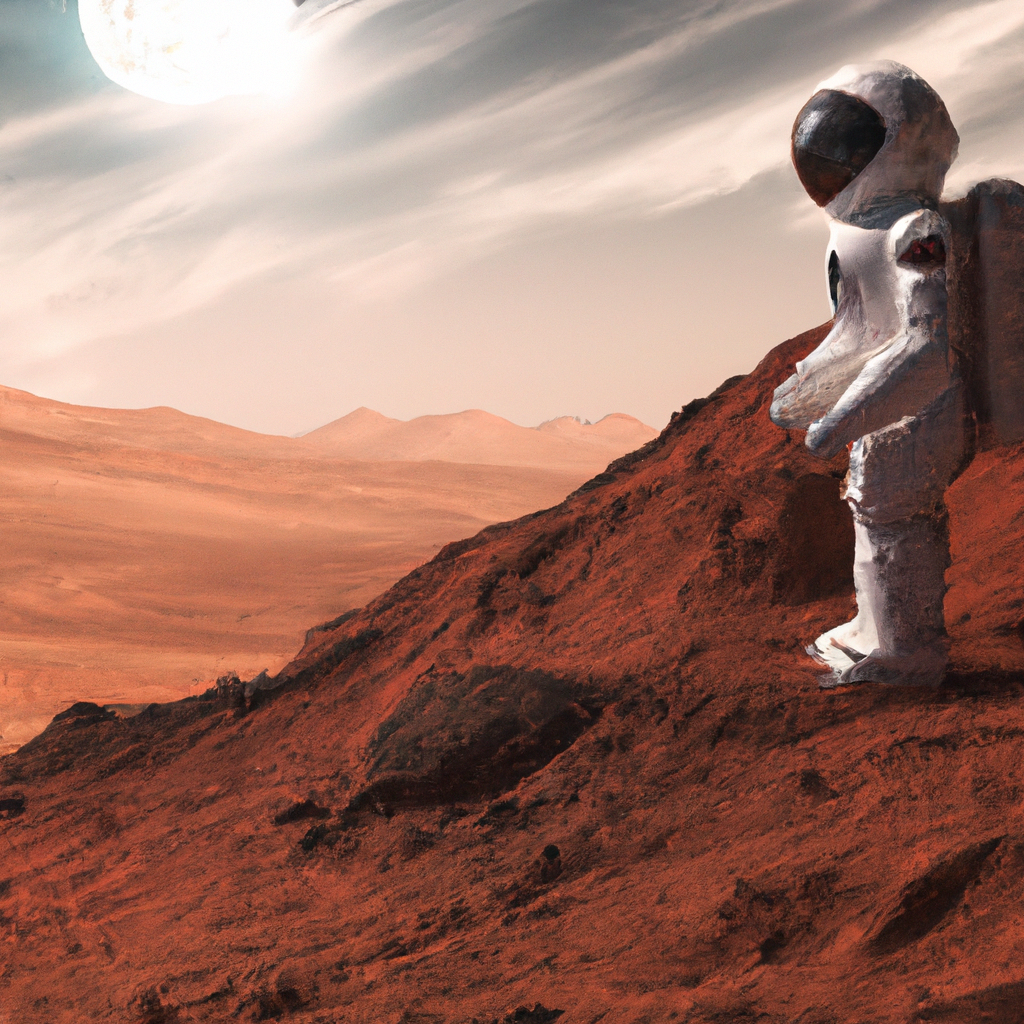

In [15]:
# displaying the image
url = image_url
image = Image.open(requests.get(url, stream=True).raw)
image.save("c_image.png", "PNG")
c_image = Image.open(requests.get(url, stream=True).raw)
c_image

# 8.Listening to the Poem with gTTS

In [16]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS(text)
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

# 9.Whisper transcribes the audio
Whisper can be implemented to transcribe audio files to fit your project: meetings, conferences, other.

In [17]:
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-q18j9xpo
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-q18j9xpo
  Resolved https://github.com/openai/whisper.git to commit b5851c6c40e753606765ac45b85b298e3ae9e00d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=796955 sha256=e7c239a40e1a594e775077bb3b4b6b323599178a140b42e7a78d3856c2831179
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7c3utwb/wheels/fe/03/29/e7919208d11b4ab32972cb448bb84a9a675d92cd52c9a48341
Successfully built openai-whisper


Transcribing the wav file

In [18]:
!whisper  1.wav

100%|███████████████████████████████████████| 461M/461M [00:09<00:00, 53.1MiB/s]
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:07.360]  Once upon a cosmic line—a group of brave souls did align—astronauts of starlit fame
[00:07.360 --> 00:13.820]  embarked on journeys to claim—the secrets of the Red Terrain—Mars—a planet they
[00:13.820 --> 00:18.020]  wished to gain—off they went from Earth's embrace.
[00:18.020 --> 00:23.980]  In a ship adorned in stellar lace—eyes transfixed—gazes wide.
[00:23.980 --> 00:29.540]  On the galaxy vast and wide—they ventured forth, without a trace.
[00:29.540 --> 00:36.500]  Into the boundless, yawning space—a mission hard—to conquer lands—demanded skill of
[00:36.500 --

Read json file and display the text object

In [19]:
import json

with open('1.json') as f:
    data = json.load(f)

text = data['text']
print(text)

 Once upon a cosmic line—a group of brave souls did align—astronauts of starlit fame embarked on journeys to claim—the secrets of the Red Terrain—Mars—a planet they wished to gain—off they went from Earth's embrace. In a ship adorned in stellar lace—eyes transfixed—gazes wide. On the galaxy vast and wide—they ventured forth, without a trace. Into the boundless, yawning space—a mission hard—to conquer lands—demanded skill of finest strands—so chosen—each for what they knew—handpicked for tasks they'd have to do—their hearts with purpose—minds with grace—they soldiered on till they'd find their place—onward through celestial oceans. The team showed great devotion. They weaved through asteroids so dexterous—and conquered glitches—vext but wistful. Through trials came a sense of glee—unbreakable bonds they'd come to see—a giant it seemed. Mars up close—excitement surged—as did their hopes. With careful steps—they prepared to land—thrilling hearts and trembling hands. On the ship went—a gal